In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import random
import re
import matplotlib.pyplot as plt

In [2]:
# Importing the proteins data
ns4a = []
ns4ad = []
       
f = open("../../../../../../Data/Proteins/DENV1/NS4A/DENV1_NS4A.txt", "r")
for x in f:
    if "DSS" in x:
        ns4ad.append(1)
    elif "DHF" in x:
        ns4ad.append(1)
    elif x[0] == ">":
        ns4ad.append(0)
    else:
        x = x.replace("\n", "")
        ns4a.append(x)

In [3]:
# Converting the array into DataFrames
ns4a = pd.DataFrame(ns4a)

# Attaching the "Disease" label column to the input
ns4a["Disease"] = ns4ad

# Renaming the columns
ns4a = ns4a.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})

In [4]:
print("The combined shape of the given data is:", str(ns4a.shape))
print("The length of the combined data is:", str(len(ns4a.index)))
print("Does the combined data have any null value? ->", ns4a.isnull().values.any())

ns4a = ns4a.dropna(how = 'any',axis = 0) 

# Shuffling the data and then taking a peek
ns4a = ns4a.sample(frac = 1)
print(ns4a.head())

The combined shape of the given data is: (999, 2)
The length of the combined data is: 999
Does the combined data have any null value? -> False
                                              Sequence  Disease
641  SVSGDLILEIGKLPQHLTQRAQNALDNLVMLHNSEQGGRAYRHAME...        1
442  SVSGDLILEIGKLPQHLTLRAQNALDNLVMLHNSEQGGKAYRHAME...        0
57   SVSGDLILEIGKLPQHLTQRAQNALDNLVMLHNSEQGGRAYRHAME...        0
171  SVSGDLILEIGKLPQHLTQRAQNALDNLVMLHNSEQGGRAYRHAME...        0
54   SVSGDLILEIGKLPQHLTQRAQNALDNLVMLHNSEQGGRAYRHAME...        0


In [5]:
# Function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size = 6):
    return [sequence[x:x + size].lower() for x in range(len(sequence) - size + 1)]

ns4a['words'] = ns4a.apply(lambda x: getKmers(x['Sequence']), axis = 1)
ns4a = ns4a.drop('Sequence', axis=1)

ns4a_texts = list(ns4a['words'])
for item in range(len(ns4a_texts)):
    ns4a_texts[item] = ' '.join(ns4a_texts[item])

The shape of y is: (999,)


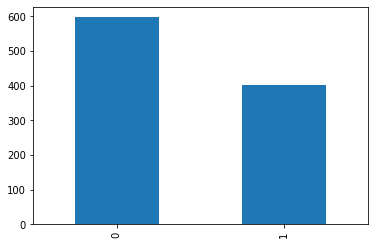

In [6]:
# Creating y and printing the shape of it
y = ns4a.iloc[:, 0].values
print("The shape of y is:", y.shape)

# Checking the balance of the disease severity
ns4a["Disease"].value_counts().sort_index().plot.bar()

In [8]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (4,4))
x = cv.fit_transform(ns4a_texts)

# Print the shape of x
print("The shape of x matrix is:", x.shape)

The shape of x matrix is: (999, 578)


## Nested Cross-Validation

In [9]:
from sklearn.model_selection import cross_val_score
# search for an optimal value of K for KNN
# range of k we want to try
k_range = range(1, 30)
# empty list to store scores
k_scores = []

In [10]:
from sklearn.neighbors import KNeighborsClassifier
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors = k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x, y, cv = 10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    
    print("The score for number of neighbours =", k, "is:", scores.mean())

The score for number of neighbours = 1 is: 0.5614781478147814
The score for number of neighbours = 2 is: 0.5976597659765976
The score for number of neighbours = 3 is: 0.5976498649864986
The score for number of neighbours = 4 is: 0.5774589458945895
The score for number of neighbours = 5 is: 0.5644286428642864
The score for number of neighbours = 6 is: 0.5744890489048904
The score for number of neighbours = 7 is: 0.5604282428242825
The score for number of neighbours = 8 is: 0.5764890489048904
The score for number of neighbours = 9 is: 0.5614084408440844
The score for number of neighbours = 10 is: 0.5886195619561956
The score for number of neighbours = 11 is: 0.5875993599359937
The score for number of neighbours = 12 is: 0.5946197619761977
The score for number of neighbours = 13 is: 0.5755496549654966
The score for number of neighbours = 14 is: 0.5896395639563956
The score for number of neighbours = 15 is: 0.5714589458945895
The score for number of neighbours = 16 is: 0.5754688468846885
T

Length of list 29
Max of list 0.5976597659765976


Text(0, 0.5, 'Cross-validated accuracy')

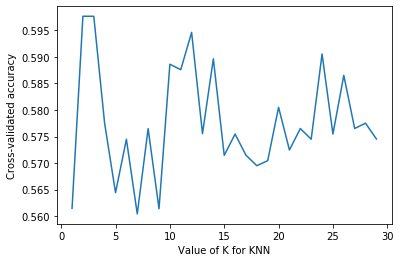

In [11]:
# in essence, this is basically running the k-fold cross-validation method 30 times because
# we want to run through K values from 1 to 30.
# we should have 21 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')